### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미 
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

iris_data = load_iris()
X_train,X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test,pred)

print(f'정확도 :{accuracy:.4f}','\n')
print(f'classification report : \n {creport}')



정확도 :0.9333 

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



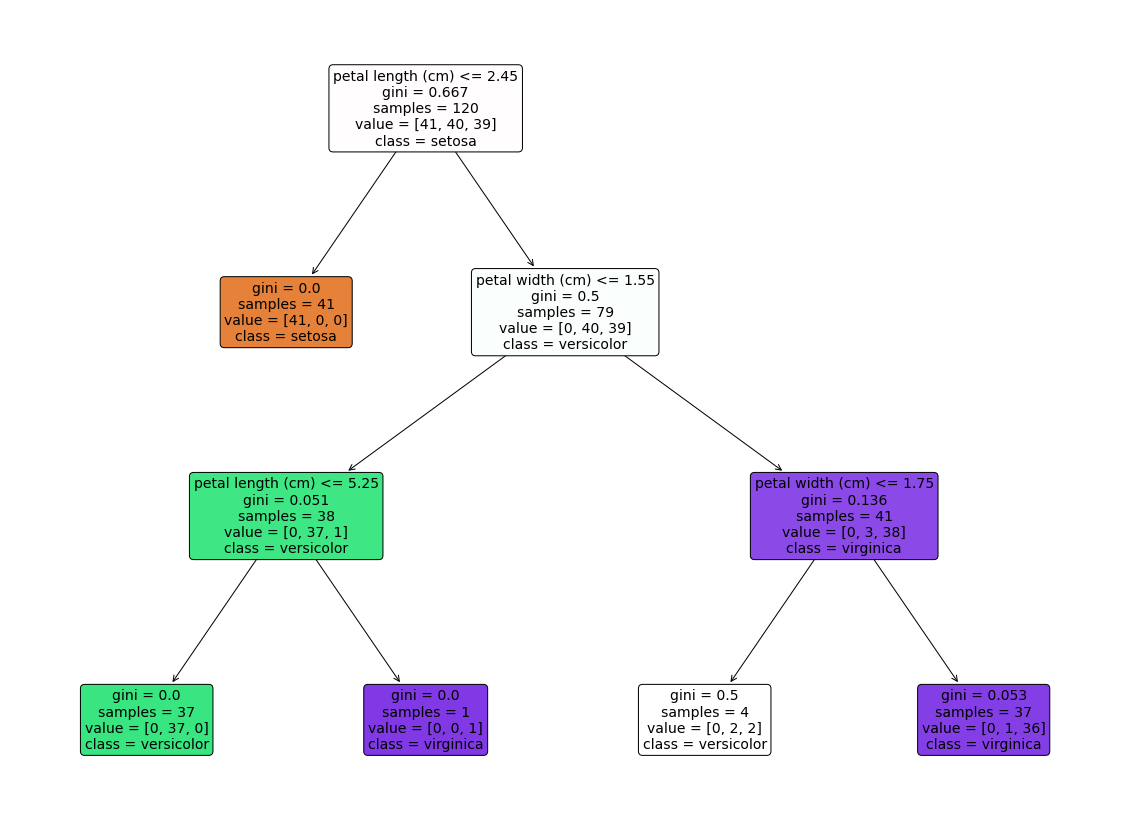

In [8]:
# 시각화

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
              feature_names=iris_data.feature_names,
              class_names=iris_data.target_names,
              rounded=True, fontsize=14)
plt.show()
plt.close()

Feature Importances: 
 [0.    0.    0.558 0.442] 

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442



<AxesSubplot:>

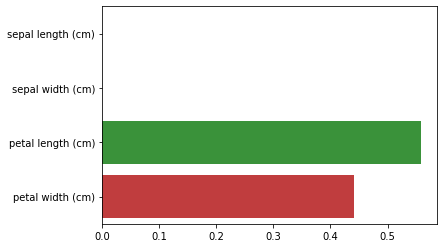

In [11]:
import seaborn as sns
import numpy as np

print(f'Feature Importances: \n {np.round(dt_clf.feature_importances_,3)}','\n')
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')
print()
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

과제_0920_1

'human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

feature_name_df = pd.read_csv('human_activity/features.txt',sep='\s+', header=None)
feature_name_df.head()

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
